In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## **DATA DESCRIPTION**
The dataset was collected by The Pacific Laboratory for Artificial Intelligence (PLAI), which is a research group at UBC. PLAI set up a MineCraft server where they observed the players' gameplay, speech, and key presses.

The dataset consists of two files: players.csv and sessions.csv. 

### players.csv

The players.csv contains a total of 196 rows (observations) and 7 columns (variables). It was described as a list that contains the information of all the players. 

Below are the variables' summary statistics and what they represent. 

#### experience 
* Data type = factor
* Describes what skillset the player is classified: Amateur, Beginner, Regular, Pro, Veteran
* Class and mode = Character

#### subscribe:
* Data type = logical
* Describes whether the player is subscribed to the game-related newsletter
* 144 TRUE and 52 FALSE 

#### hashedEmail:
* Data type = character
* The email address of the player converted as a privacy-safe representation

#### played_hours:
* Data type = double
* The amount of time (in hours) the player has spent playing the game
* Mean = 5.86
* 3rd Qu = 0.60
* Max. = 223.10

#### name:
* Data type = Character
* The name of the player

#### gender:
* Data type = factor
* What gender the player identifies as (Male, Female, Non-binary, Two-Spirited, Agender, prefers not to say, other)
* Class and mode = Character

#### Age:
* Date type = integer
* How old the player is in years
* Min = 9.00
* 1st Qu = 19
* Median = 17
* Mean = 21.14
* 3rd Qu = 22.75
* Max = 58
* NA = 2


### sessions.csv
The sessions.csv, which was described as "a list of individual play sessions by each player," consists of 1535 rows (observations) and 5 columns (variables). 

Below are the variables' summary statistics and what they represent. 

#### hashedEmail:
* Data type = character
* The email address of the player converted as a privacy-safe representation

#### start_time:
* Data type = character
* The time the player began their play session (includes the date and hour)

#### end_time:
* Data type = character
* The time the player stopped their play session (includes the date and hour)
  
#### original_start_time 
* Data type = double
* The same as the start_time but recorded in UNIX time (milliseconds).
* Min = 1.71e+12
* 1st Qu. = 1.72e+12
* Median = 1.72e+12
* Mean = 1.72e+12
* 3rd Qu. = 1.72e+12
* Max = 1.73e+12  
                    
#### original_end_time:
* Data type = double
* The same as the end_time but recorded in UNIX time (milliseconds)
* Min = 1.71e+12
* 1st Qu = 1.72e+12
* Median = 1.72e+12
* Mean = 1.72e+12
* 3rd Qu = 1.72e+12
* Max = 1.73e+12
* NA = 2


Some potential issues I see in the data would be the NAs (missing data) in both datasets. For players.csv, it is present in the Age and subscribe variable, and for the sessions.csv, it is present in the original_end_time variable. We would have to specify to R to ignore these NA values if we are using those two variables. 

Something I noted too is that Age is a dbt. In this case, however, I will switch it to an int as the dataset does not determine age to be a decimal and only takes it as a whole number.

In [2]:
#Inputting the dataset into R

player_data <- read_csv("data/players.csv")

session_data <- read_csv("data/sessions.csv")


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#The summary statistics of players.csv

summary_player_data <- summary(player_data)
summary_player_data

player_data |>
distinct(experience, gender)


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

experience,gender
<chr>,<chr>
Pro,Male
Veteran,Male
Amateur,Female
⋮,⋮
Amateur,Non-binary
Regular,Two-Spirited
Pro,Other


In [4]:
#The summary statistic of sessions.csv
summary_session_data <- summary(session_data)
summary_session_data

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

## **QUESTION TO BE EXPLORED**
The question I want to address is what characteristics and behaviours are the most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? More specifically, I want to explore whether the **age** and their **total time played** of a player can predict whether the player is subscribed to the game-related newsletter.  

#### Wrangling the Data and the Predictive Method
I will be utilizing the players.csv file of the dataset as this includes the variables I plan to work with
* age
* played_hours
* subscribe

The predictive method I plan to use is K-nearest neighbour classification, as the outcome variable will be whether the player is subscribed or not (two groups in the variable, which are TRUE or FALSE). The two predictors I plan to use are age (integer) and played_hours (dbt) which each contain 196 observations each. These predictors will allow us to observe whether they have an impact if a player is subscribed to the game-related newsletter. 

The data will have to be wrangled in order to use it for K-nearest neighbour classifcation. 

* Select the variables required (age, played_hours, subscribe)
* Ensure to filter out the NA's in age
* Turn subscribe into a factor and replace the TRUE and FALSE names of factor values with other names (subscribed and not subscribed)

## **Exploratory Data Analysis**

The dataset (specifically players.csv) has been loaded into R already. We will now have to wrangle the data in order to turn it into a tidy format

In [5]:
# Turning the data tidy

#
player_data_wrangled <- player_data |>
    select(Age, played_hours, subscribe) |>
    na.omit(Age) |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(subscribe = fct_recode(subscribe, "subscribed" = "TRUE", "not subscribed" = "FALSE"))

player_data_wrangled

Age,played_hours,subscribe
<dbl>,<dbl>,<fct>
9,30.3,subscribed
17,3.8,subscribed
17,0.0,not subscribed
⋮,⋮,⋮
22,0.3,not subscribed
57,0.0,not subscribed
17,2.3,not subscribed


In [10]:
# computing the mean for Age
age_mean <- player_data_wrangled |>
    summarize(average_age = mean(Age))

age_mean

# computing the mean for played_hours
played_hours_mean <- player_data_wrangled |>
    summarize(average_hours = mean(played_hours))
played_hours_mean

average_age
<dbl>
21.13918


average_hours
<dbl>
5.904639


#### Mean of Age and played_hours

| Age | played_hours |
| --- | --- |
| 21.14 | 5.90 |

### Visualizations

x = age and y = played_hours then do the subscribe as colour!

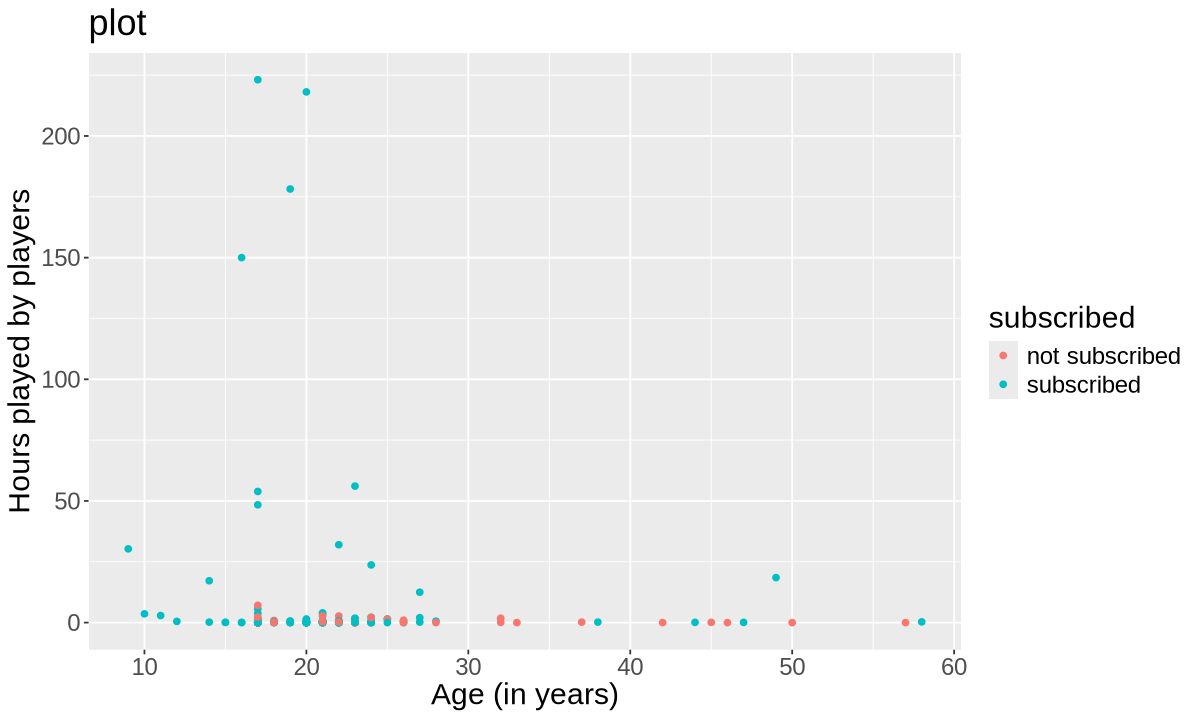

In [7]:
options(repr.plot.width = 10, repr.plot.height = 6)

plot <- player_data_wrangled |>
    ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point() +
    labs(title = "plot", x = "Age (in years)", y = "Hours played by players", colour = "subscribed") +
    theme(text = element_text(size = 18))

plot



Make a few exploratory visualizations of the data to help you understand it.
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question
Note: do not perform any predictive analysis here. We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.



## METHODS AND PLAN

#### Model
The method I plan to use to address my question is K-nearest neighbour classification. This method is appropriate as I want to predict a categorical label for an observation, that being whether the player is subscribed based on their age and played hours. The other two models, K-nearest neighbour regression and linear regression, would not work as both of their response variables give quantitative values, not categorical ones.    

#### Assumptions
For the K-nearest neighbour classification model, there are not many strong assumptions made about what the data looks like. The model assumes that all the variables contribute equally to the distance calculation, meaning that if there are ones that are irrelevant or have large scales, it will cause the results to be inaccurate. The model works for both binary and multi-class classifcation problems which is the case for the question I attempt to explore. 

#### Weaknesses
A weakness of this method is that it becomes slow as the training data gets larger. It also does not do well when there is a large number of predictors since it uses the distance formula to find its points, meaning that the addition of a predictor adds more dimensions within the space. This can make the distance between the points more uniformed, where the nearest neighbours all may be relatively far away. Another weakness of KNN is that it is sensitive to noise and any outliers. This is because only one point may influence the classification of the neighbours depending on the number of K.

#### Processing the data
To process the data for the model, I will first split the player.csv file into two parts: training and testing data. I will split it as a 60:40 percent split.  

I will then have to find the value of K by splitting the training data into more training data and validation data sets. The workflow analysis will be from k = 2, 3, 4, 5, and 6. I will then use cross validation (~5 folds) and plot the accuracy found to choose the best K value. 

Then, I will do some pre-processing on the training data (create a recipe, standardize the variables), create the knn model using the K value found in the previous step, and then fit it into a workflow. 



#### How are you going to compare and select the model?

#### How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?